# __Predict Customer Clicked Ads Classification__

## Importing Necessary Libraries and Dataset

Reference: https://www.kaggle.com/code/mafrojaakter/customer-ad-click-prediction

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head() 

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [4]:
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [5]:
# drop kolom Unnamed 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Handling Missing Value

In [6]:
df[['Daily Time Spent on Site']]= df[['Daily Time Spent on Site']].fillna(df['Daily Time Spent on Site'].mean())
df[['Area Income']]= df[['Area Income']].fillna(df['Area Income'].mean())
df[['Daily Internet Usage']]= df[['Daily Internet Usage']].fillna(df['Daily Internet Usage'].mean())
df[['Male']]= df[['Male']].fillna('Laki-Laki')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [8]:
# Let's look at stats of the non-object features
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.741268,8.785562,9.346585e+07,43.627946
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.545000,29.000000,3.298201e+08,139.017500
50%,67.780000,35.000000,3.975088e+08,181.065000
75%,78.352500,42.000000,4.566932e+08,218.287500
max,91.430000,61.000000,5.563936e+08,267.010000


Let's go over each of the non-object features one by one:

- Daily Time Spent on Site: We see users spend between 32 min to 91 min on the site with a mean value of 65min, which is quite a large amount of time. This indicates that it is a popular site. We would like to see if there is any corellation with time spend on the site and 'clicked on Ad'.

- Age: The user age ranges from 19years to 61 years with a mean of 36 years, which tells us that the target users are adults.

- Area Income: The minimum users income is around 97k and the maximum user income is 556k, which tells us that the users belongs to different social classes. We would like to further investigate how the income is corelates with the click on the ad.

- Daily Internet Usage: The daily internet use ranges from 104min to 267min. Out of total daily internet use, users spend quite a large amount of time on the site, which ranges from 32 to 91 min. We will check if they both are relates to each other in some way.


In [17]:
df[kat].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,1000,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


- Male: We see users dominant on the site is Woman
- city: the most people who visite site are come from Surabaya
- province: the most visitor come from DKI Jakarta
- category: there are 10 unique category, and Otomotif is the most visitor find in this site 

## Univariate Analysis

umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak

In [9]:
#membagi data dalam numerik dan kategorik
num = df.select_dtypes('number').columns
kat = df.select_dtypes('object').columns

In [10]:
num

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')

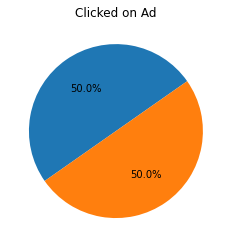

In [11]:
#menemukan masalah utama yaitu tingkat attrition
plt.pie(df['Clicked on Ad'].value_counts(), autopct='%1.1f%%',  startangle=35)
plt.title('Clicked on Ad')
plt.show()

### Numerical Features

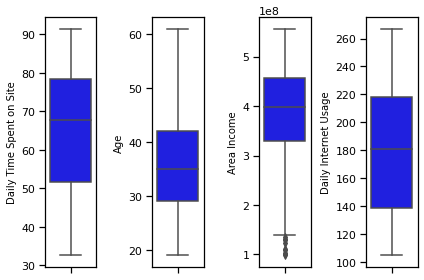

In [12]:
# Box Plot
num = num
for i in range (0, len(num)):
    plt.subplot(1,len(num), i+1)
    sns.boxplot(y=df[num[i]], color= 'blue', orient='v')
    plt.tight_layout()

data yang kita miliki tidak memiliki outlier, namun tidak memiliki distribusi normal

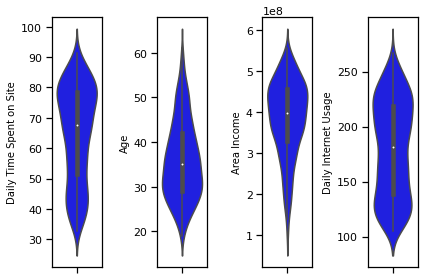

In [13]:
# Violin plot
for i in range(0,len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]],color='blue')
    plt.tight_layout()

- pada feature daily time spent on site, distribusi bimodal sedikit positive skewed
- feature Age berdistribusi negatif skewed, yang berarti mode/ data terbanyak berada dibawah rata-rata
- feature area income berdistribusi positif skewed yang artinya data mode berada diatas nilai mean/rat-rata
- sedangkan daily internet usage memiliki distribusi bimodal, yang artinya terdapat 2 kelompok nilai yang memiliki jumlah yang hampir sama

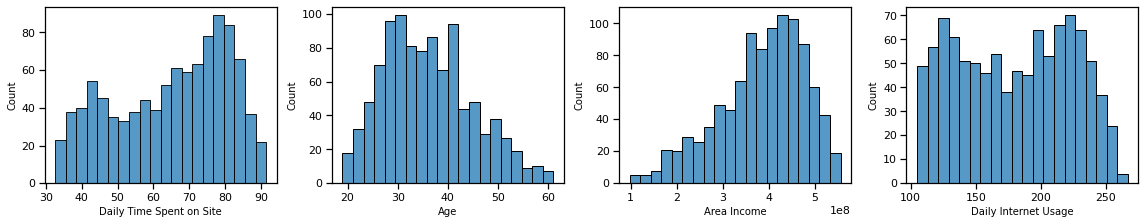

In [14]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
        plt.subplot(5,5,i+1)
        sns.histplot(x=df[j], bins=20)
        plt.tight_layout()

- waktu yang dihabiskan dalam berkunjung relatif lama
- rentang umur 26-42 merupakan pengunjung terbanyak pada situs
- area income pengunjung terbanyak berada di level 400k
- daily internet usage relatif bervariasi

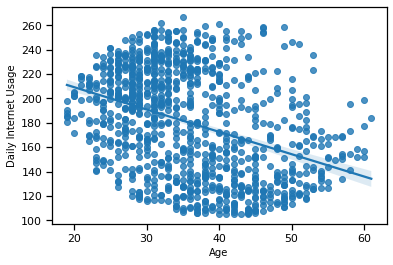

In [24]:
sns.regplot(x='Age', y='Daily Internet Usage', data=df)
plt.xlabel('Age')
plt.ylabel('Daily Internet Usage')
plt.show()

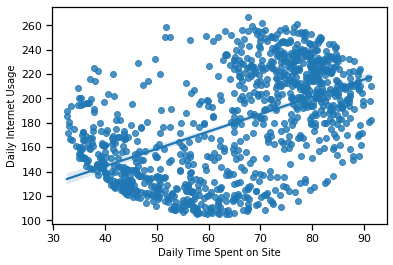

In [23]:
sns.regplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df)
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')
plt.show()

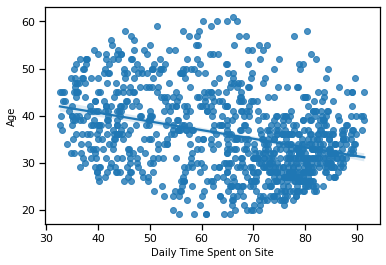

In [22]:
sns.regplot(x='Daily Time Spent on Site', y='Age', data=df)
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Age')
plt.show()

## Multivariate Analysis

<Axes: >

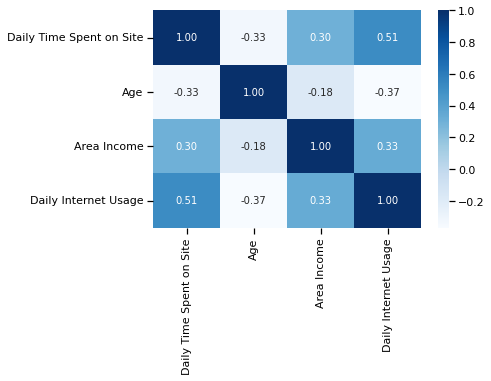

In [15]:
sns.heatmap(df.corr(),cmap='Blues', annot=True, fmt='.2f')

- Tidak ada feature yang memiliki korelasi >0.7 antar feature lainnya, 
- `age` memiliki korelasi negatif dengan `daily time spent on site`, yang artinya semakin tua pengguna semakin sedikit waktu yang dihabiskan di dalam site

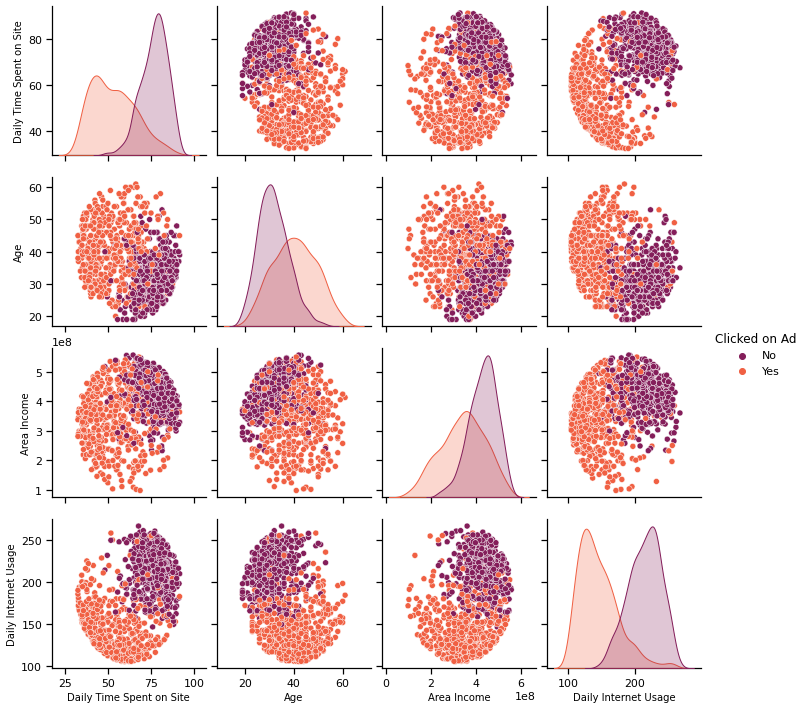

In [16]:
sns.pairplot(df, hue='Clicked on Ad', vars=['Daily Time Spent on Site', 
                                            'Age',
                                           'Area Income',
                                           'Daily Internet Usage'], palette='rocket')

- user dengan waktu kunjung lebih lama relatif tidak mengklik iklan, sebaliknya, pengjunjung yang relatif lebih sebentar berada di sites lebih sering mengklik iklan
- pengunjung yang lebih tua lebih sering mengklik iklan dibandingkan dengan pengunjung tang lebih muda
- user dengan income yang lebih besar relatif tidak mengklik iklan
- user yang memiliki waktu lebih lama di internet tidak mengklik iklan, sebaliknya untuk user yang mengklik iklan memiliki waktu berselancar yang lebih rendah